# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [95]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading Data

In [96]:
df_train = pd.read_csv("Train.csv.csv")
df_test = pd.read_csv("Test.csv.csv")

In [4]:
#loading data with google colab

#from google.colab import files
#import io

#try:
#  uploaded
#except NameError:
#  uploaded = files.upload()

#df_train = pd.read_csv(io.BytesIO(uploaded["Train.csv.csv"]))
#df_test = pd.read_csv(io.BytesIO(uploaded["Test.csv.csv"]))

## Data Overview

In [3]:
#copying data to avoid any changes to original data
df_train = df_train.copy()
df_test = df_test.copy()

In [6]:
# checking the shape of the data
print(f"There are {df_train.shape[0]} rows and {df_train.shape[1]} columns in the train dataframe.")
print("\n")
print(f"There are {df_test.shape[0]} rows and {df_test.shape[1]} columns in the test dataframe.")

There are 20000 rows and 41 columns in the train dataframe.


There are 5000 rows and 41 columns in the test dataframe.


In [7]:
# let's view a sample of the data
df_train.sample(
    10, random_state=2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
836,0.652,2.356,9.674,2.850,-0.778,-2.541,-1.988,-5.122,2.200,2.258,-5.925,-1.187,2.990,-2.205,-4.024,-9.879,-1.564,-0.510,5.324,0.748,-8.499,0.011,-7.952,0.598,2.154,6.315,2.253,-1.236,-5.079,-5.240,2.340,-2.998,-2.102,2.215,4.661,3.936,-2.421,0.900,3.319,-5.091,0
1849,-3.972,5.254,2.335,-0.156,4.530,2.165,-2.494,-5.182,1.716,-2.688,-1.137,-2.609,2.450,-3.365,-7.221,-5.581,-1.757,4.532,-4.200,-5.648,-3.688,-0.443,-1.649,2.807,-3.172,9.647,-5.633,-3.353,1.429,0.872,1.580,3.320,7.896,-6.961,0.390,-0.055,-0.596,3.620,1.437,0.587,0
16673,-0.443,-5.774,7.532,-0.451,-4.533,-3.634,-3.576,2.021,-0.527,1.552,-2.290,2.895,5.357,0.327,-4.679,-3.156,-1.977,0.359,4.350,6.238,-8.160,0.169,-3.903,-2.869,1.365,-1.865,0.993,-2.407,0.604,3.764,1.478,-1.262,0.019,2.098,8.653,4.922,0.410,-8.366,1.580,-3.286,0
527,-1.729,-1.960,1.135,0.136,-0.439,-4.095,0.117,4.585,-2.518,0.692,-5.065,7.366,1.017,0.683,-0.710,0.680,3.616,1.000,3.115,4.188,-1.843,2.029,4.328,3.032,0.785,-2.321,-1.191,0.931,-3.762,-1.012,0.014,1.740,-5.963,3.134,0.908,4.418,2.087,-3.084,1.362,-0.856,0
19846,-1.399,2.238,-1.440,-3.730,2.058,2.656,-1.231,-2.045,0.360,-3.414,2.572,1.288,2.930,-2.331,-5.519,-2.425,-2.184,4.981,-4.653,-5.095,-3.131,1.658,2.937,0.596,-3.124,4.393,-3.594,-3.222,3.797,4.509,-1.136,1.480,6.919,-6.821,0.745,-1.237,1.291,1.922,0.061,2.781,0
1497,-0.303,-3.355,1.084,-6.473,-1.469,2.097,0.249,-0.887,-2.386,2.058,3.757,2.339,1.615,0.328,0.647,1.816,-5.660,1.592,-1.166,-2.481,0.738,-0.962,-2.476,-4.099,0.140,-1.899,5.266,-2.005,2.557,1.215,1.551,-4.999,2.075,0.814,-0.309,4.672,1.099,0.847,2.492,1.927,0
16622,-3.893,-2.546,-3.858,4.011,1.057,-0.190,-2.094,0.587,-0.911,2.461,-1.290,-2.580,-1.272,1.676,-2.877,-0.292,0.721,1.104,1.604,1.112,0.353,1.668,4.180,7.351,-2.983,-2.610,-4.551,2.342,-1.522,3.407,-0.721,11.544,3.443,-0.157,3.046,-1.982,-1.638,0.287,-1.386,-4.768,1
5043,-3.506,-1.292,1.097,-1.798,-1.213,1.116,-1.852,-3.575,1.575,-0.535,2.216,0.988,6.077,-0.861,-6.544,-3.643,-4.313,2.249,-0.267,0.269,-3.434,-0.221,-2.003,-4.751,-1.803,1.509,0.759,-2.148,1.767,2.350,-4.309,-4.254,2.850,0.508,0.413,1.104,1.557,0.839,3.224,-2.467,0
16981,-0.358,-2.642,-3.740,0.134,-0.910,-0.823,-0.560,2.713,-1.127,-0.073,-0.417,2.988,0.078,0.876,-1.639,-0.105,2.044,2.025,1.108,2.004,-1.533,3.518,6.376,3.552,-1.158,-4.225,-2.270,1.395,-0.384,3.767,-2.994,4.643,-0.432,-0.250,2.336,-1.365,1.122,-1.367,-1.396,-0.960,0
19634,3.890,-3.203,4.528,-3.544,-4.632,0.515,-1.984,-2.122,-0.163,1.410,2.983,1.506,3.705,-1.457,-3.356,-5.811,-5.542,1.436,3.491,-1.037,-9.012,2.456,-3.245,-2.129,0.346,-0.718,3.797,-2.621,2.863,5.225,-0.175,-2.957,4.166,-0.996,9.187,0.707,-0.987,-1.440,0.223,-1.722,0


* For now no values seem to be missing. We will investigate this later.

* Columns are formatted correctly.

In [8]:
# checking for duplicate values in the data
df_train.duplicated().sum()

0

* There are no duplicate values in the data.

In [9]:
# checking column datatypes and number of non-null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

* All features are numeric (*float* and *int* type).
* There are null values for V1 and V2.

In [10]:
# checking null values in the test dataframe
df_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

* There are also null values for V1 and V2 in the test dataframe.

In [11]:
# Let's look at the statistical summary of the data
df_train.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


#### Observations
* All features have negative values and positive values.
* V16 has the lowest minimum (-20.374) and V32 has the highest maximum (23.633).
* Means for features vary and range from -3.611 to 2.485
* std for features vary and range from 1.652 to 5.500.
* Because the data is ciphered, it is difficult to identify trends based on the statstical summary. We will use visualization tools to get a stronger overview of the dataset. 

## EDA

### Plotting histograms and boxplots for all the variables

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

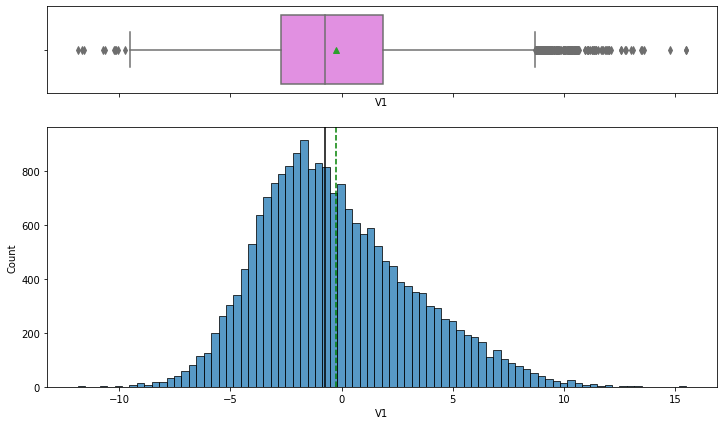

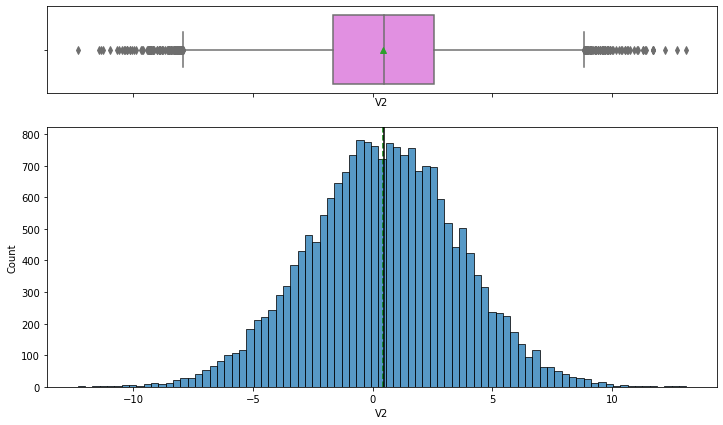

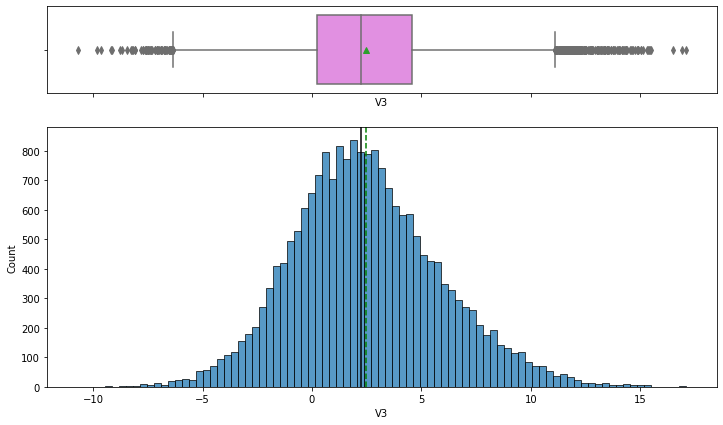

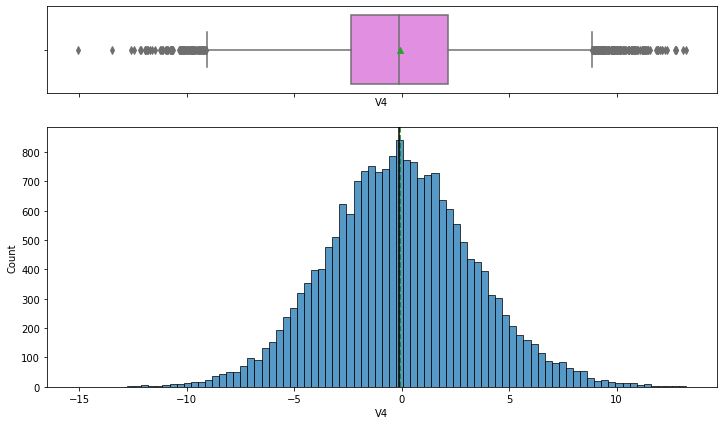

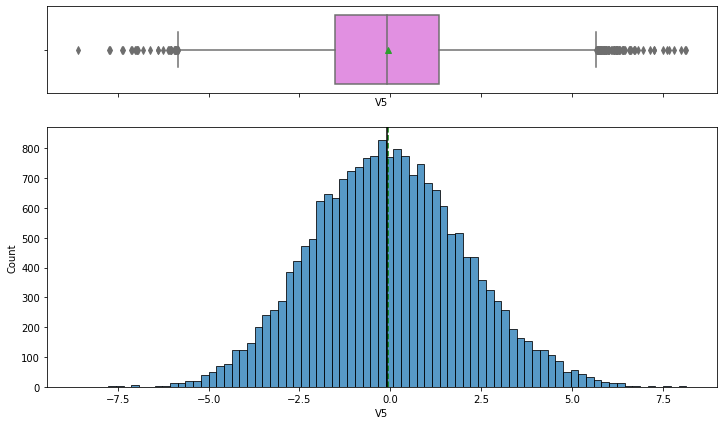

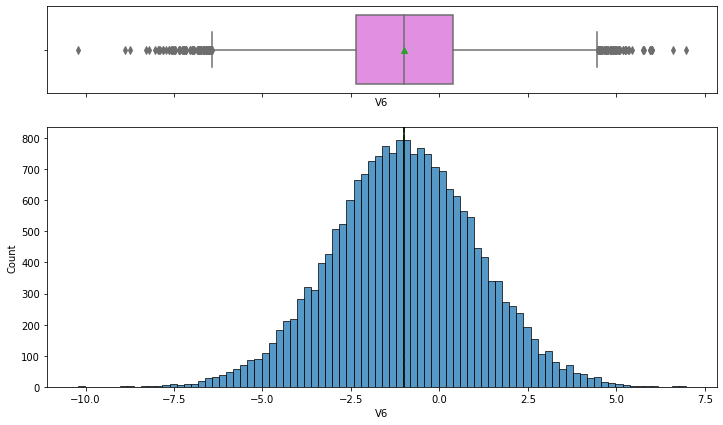

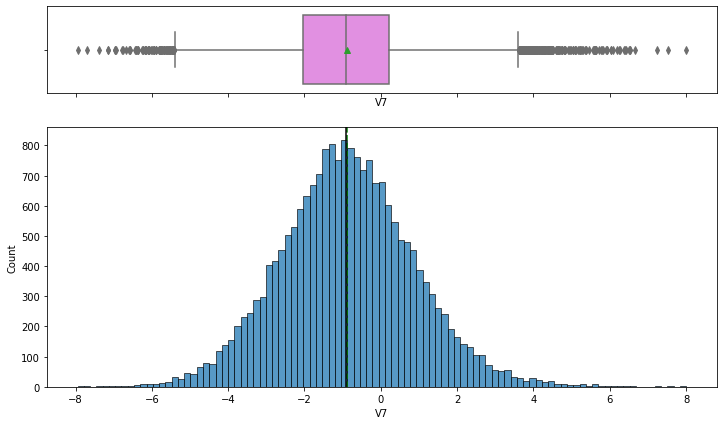

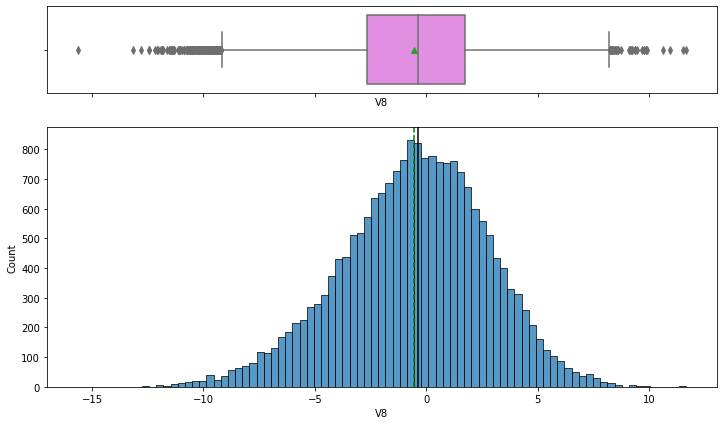

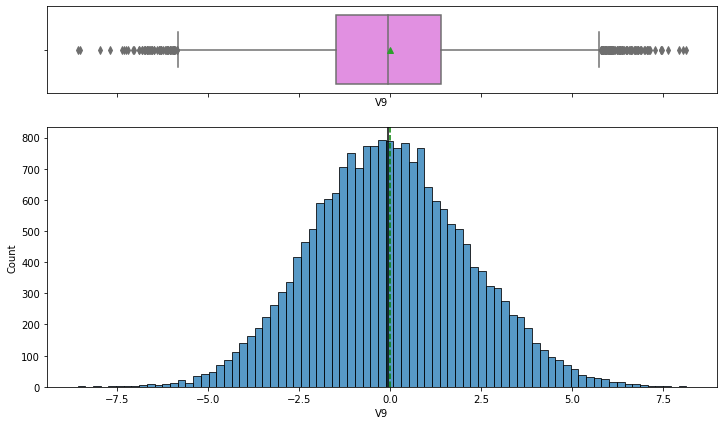

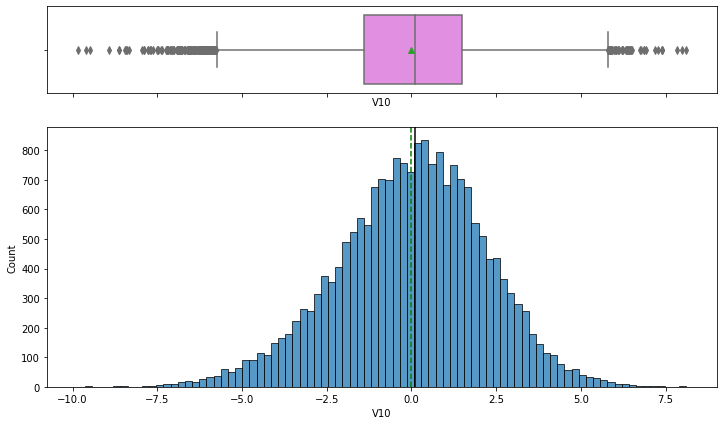

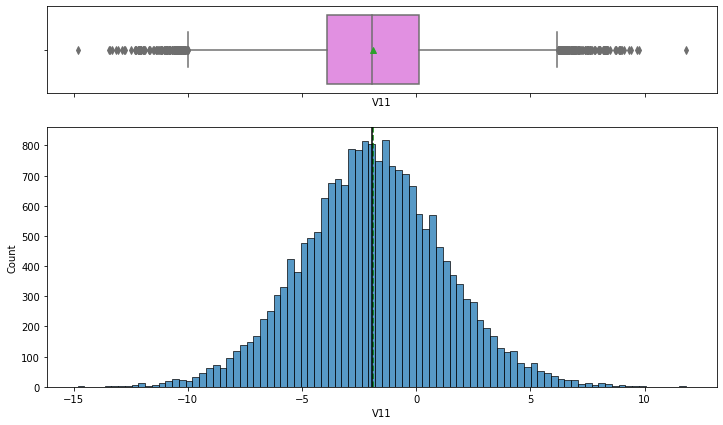

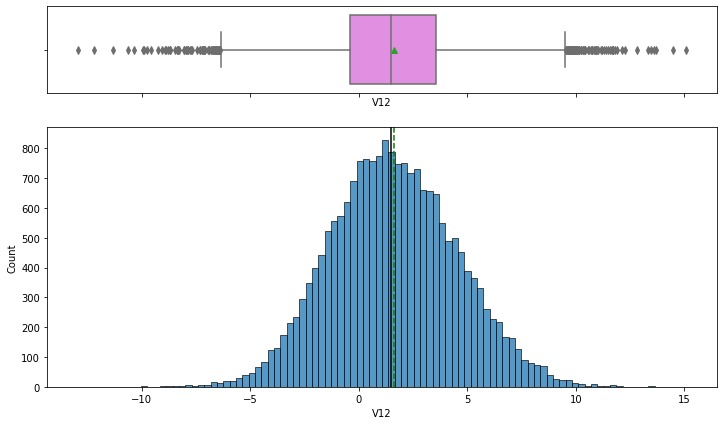

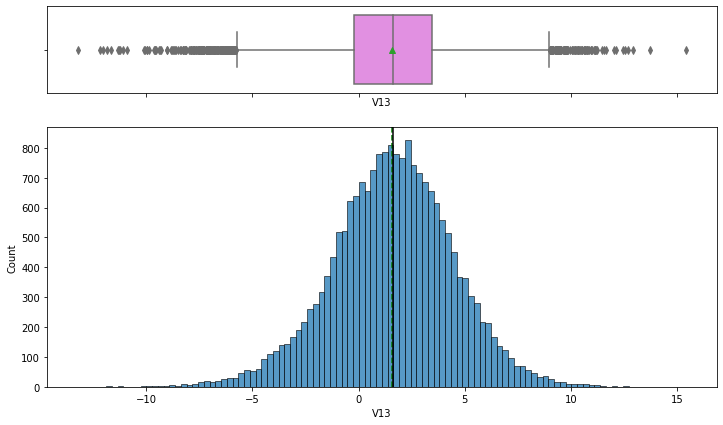

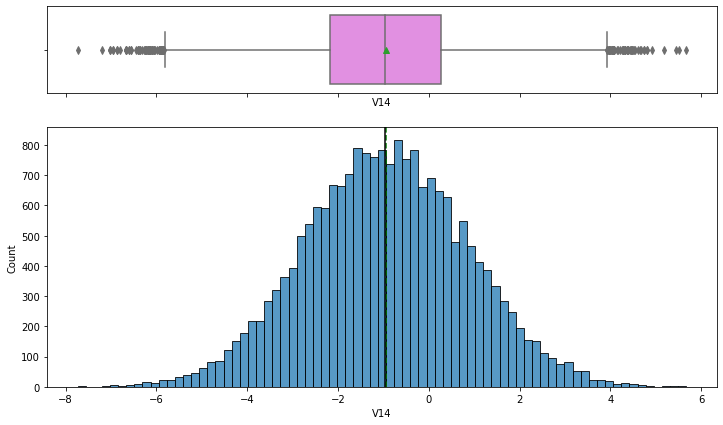

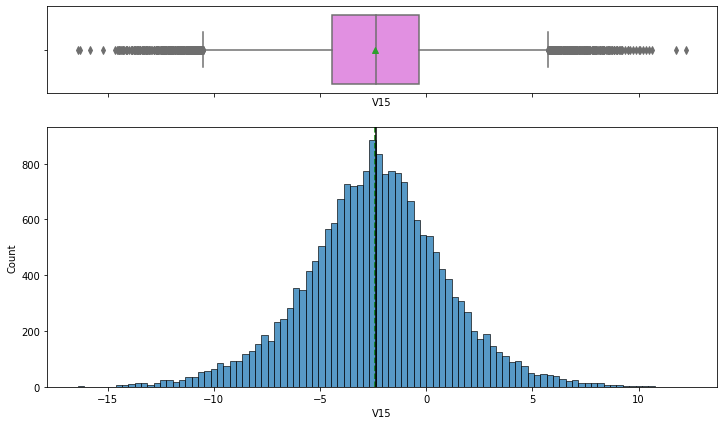

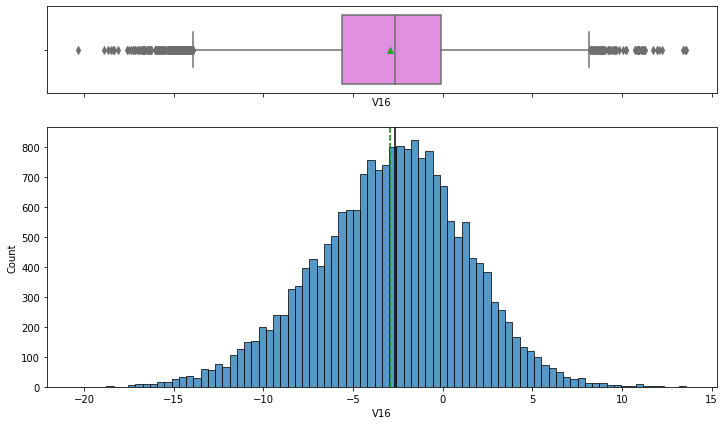

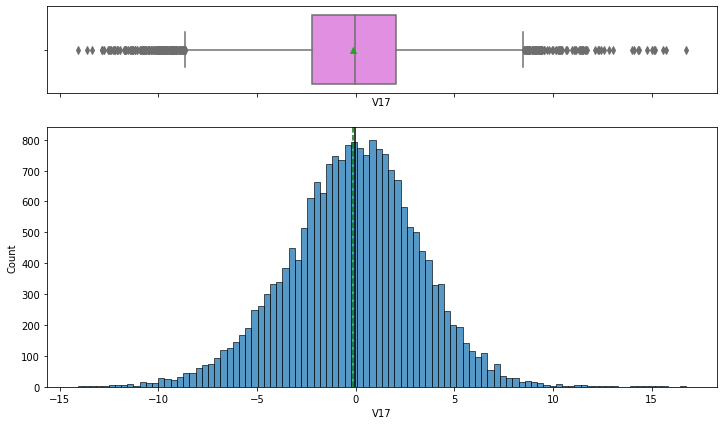

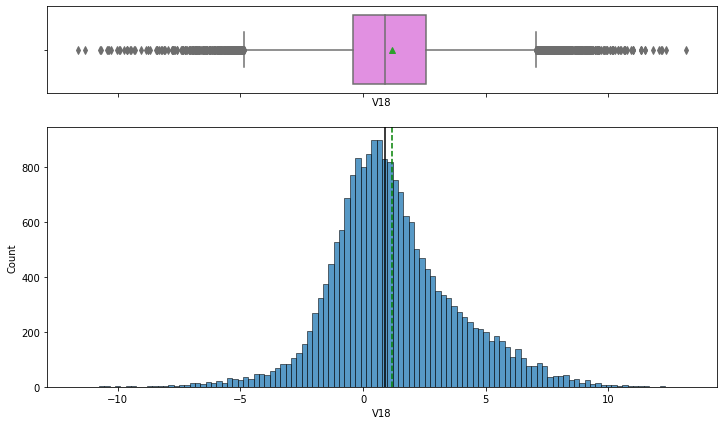

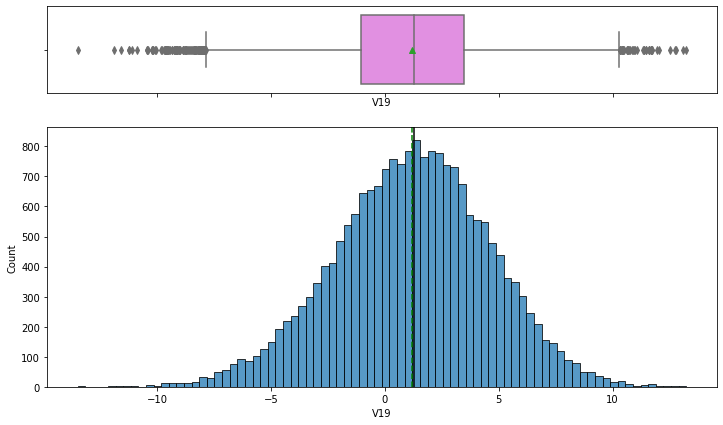

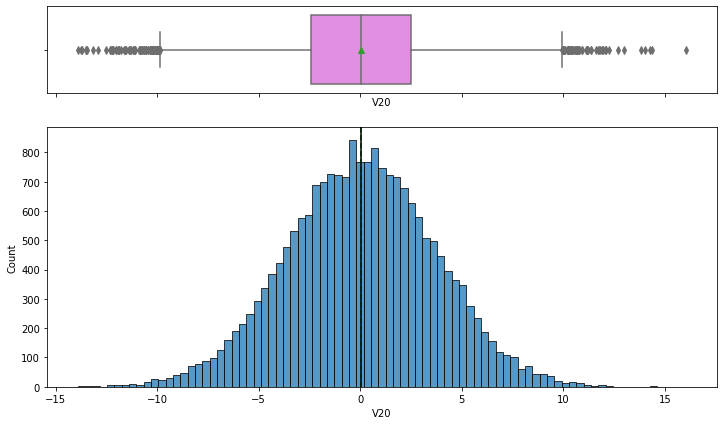

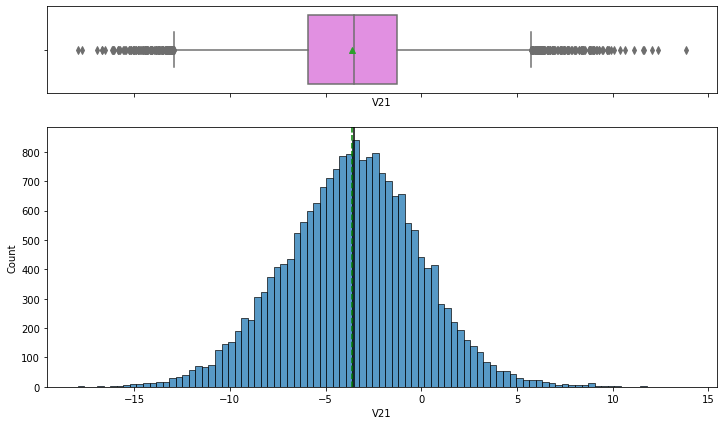

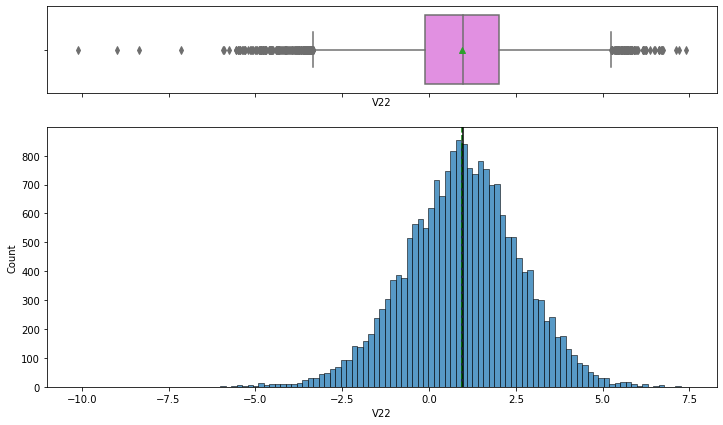

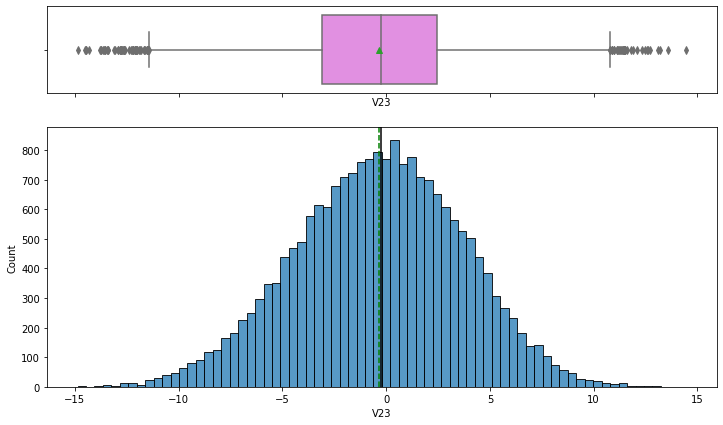

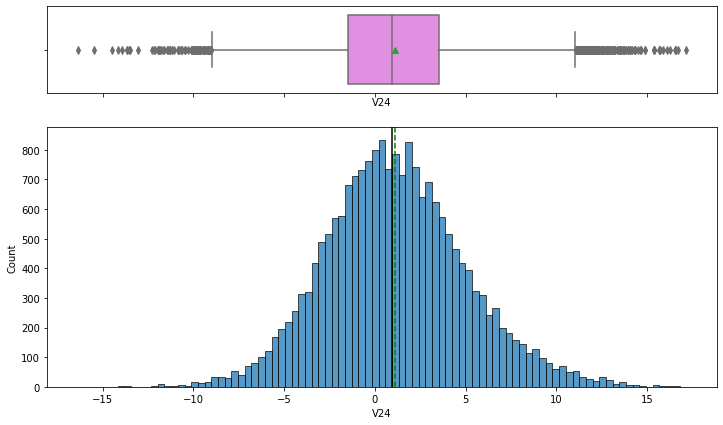

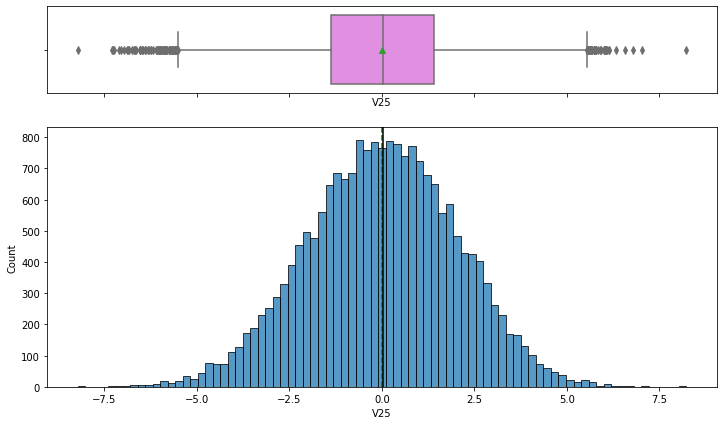

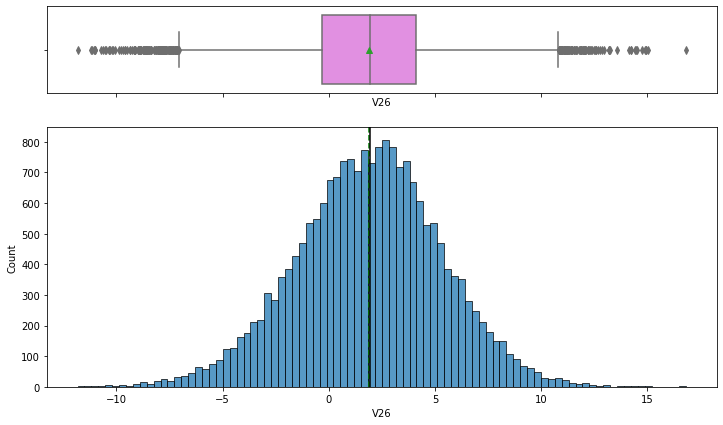

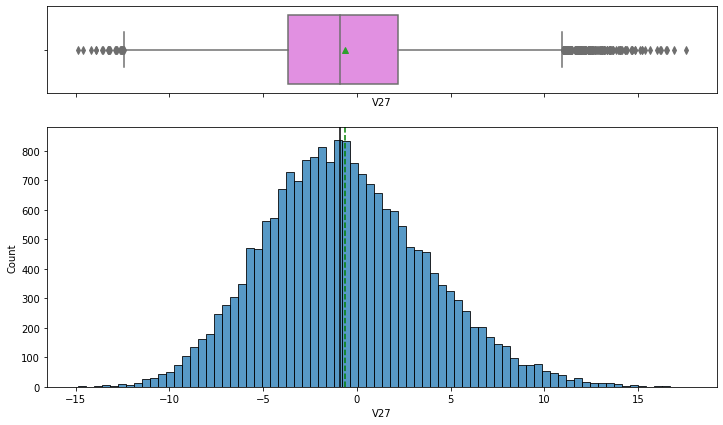

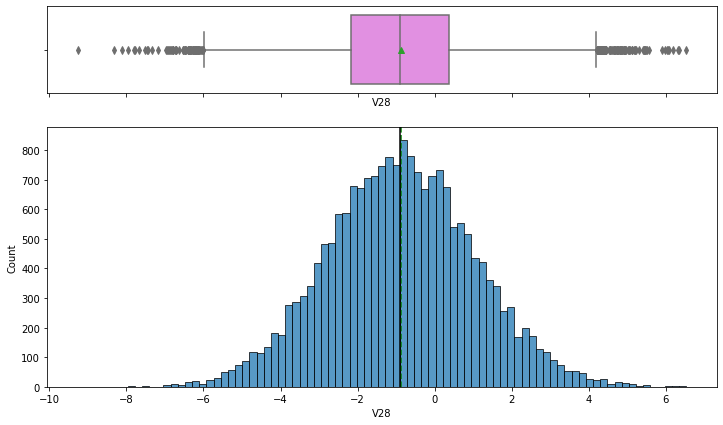

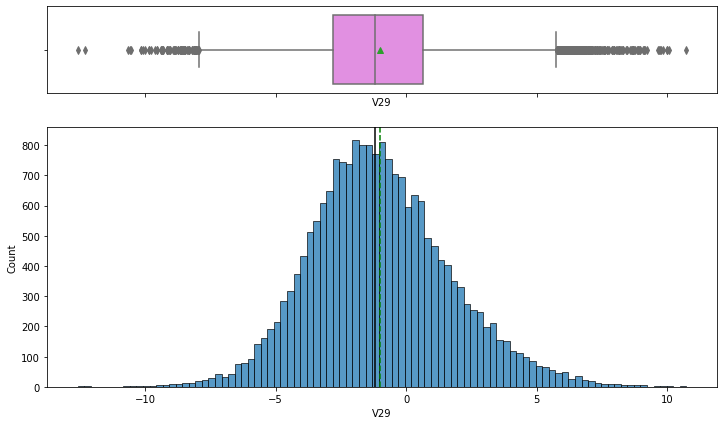

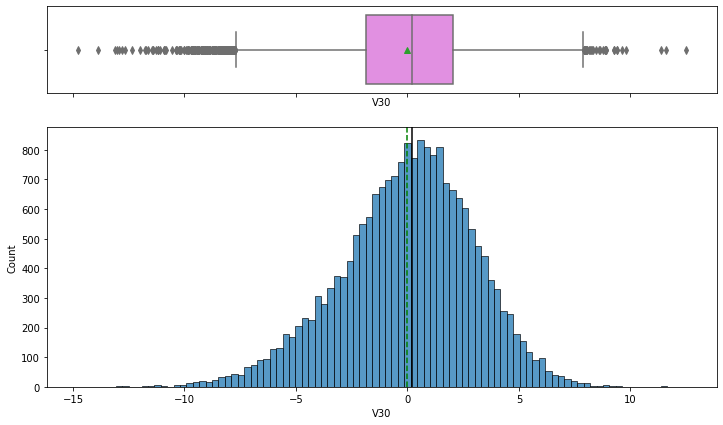

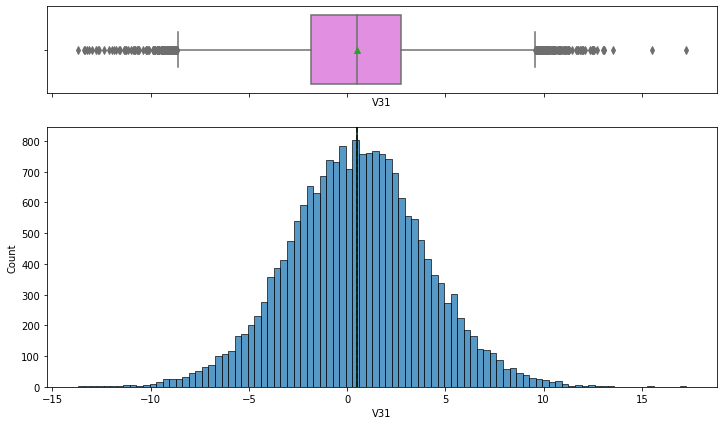

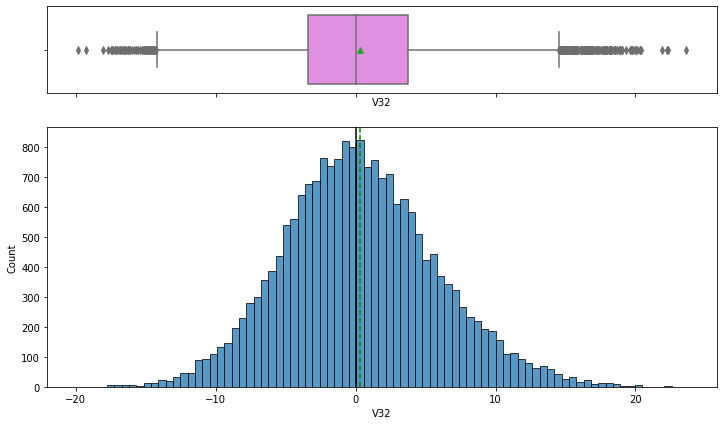

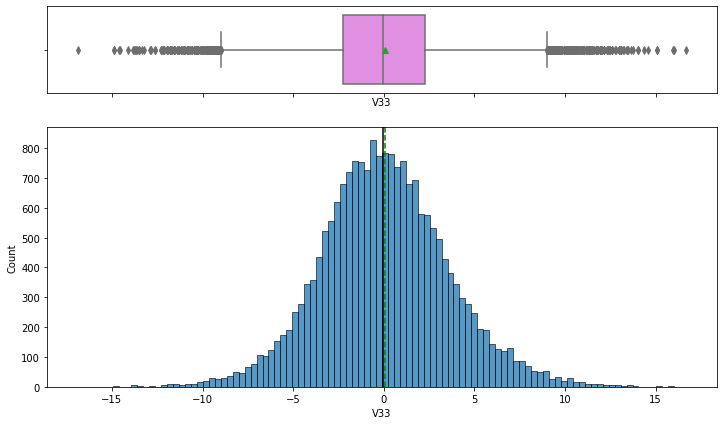

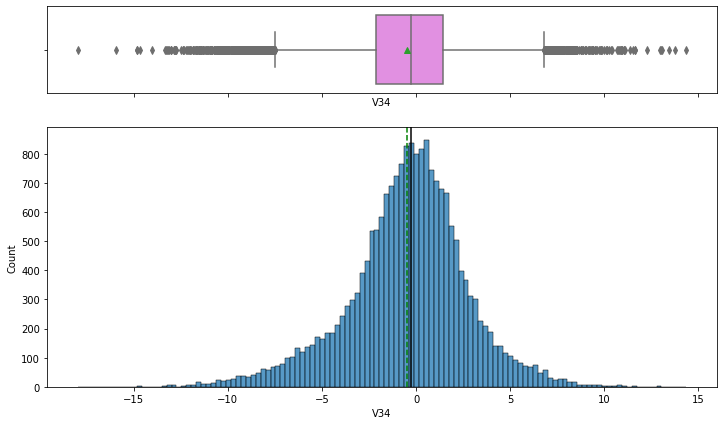

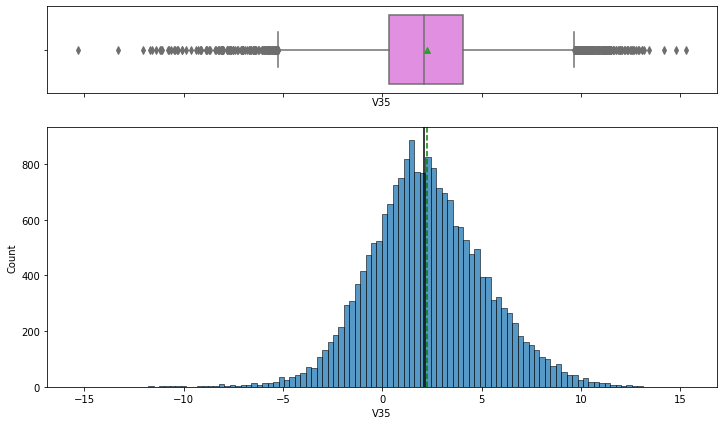

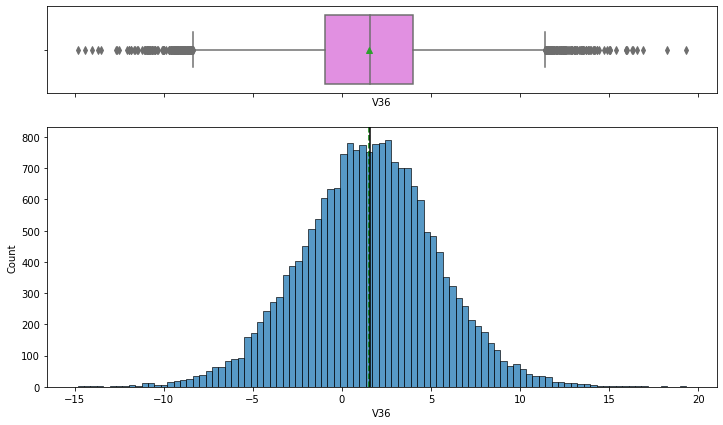

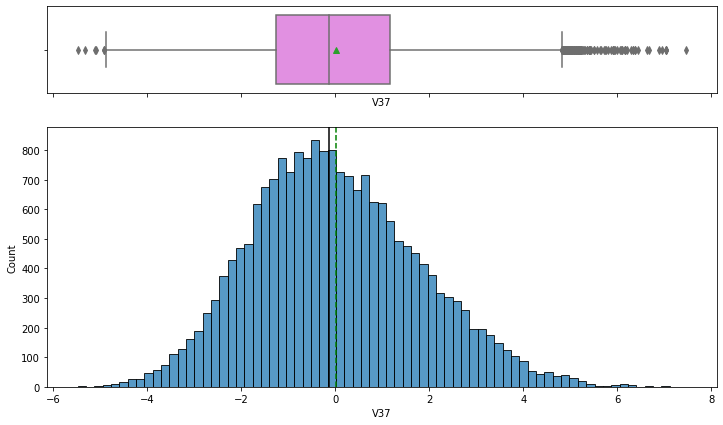

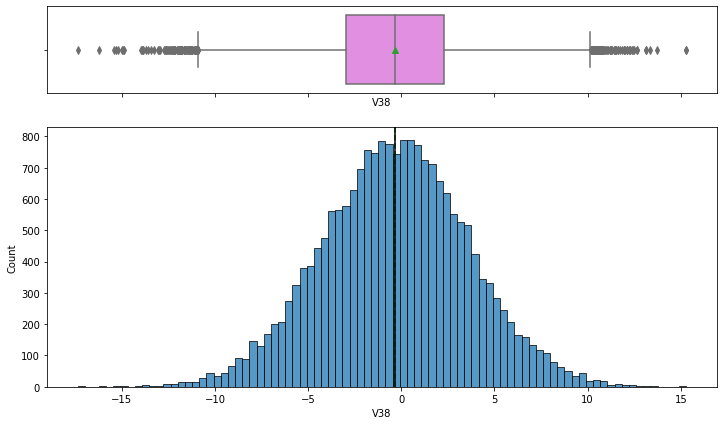

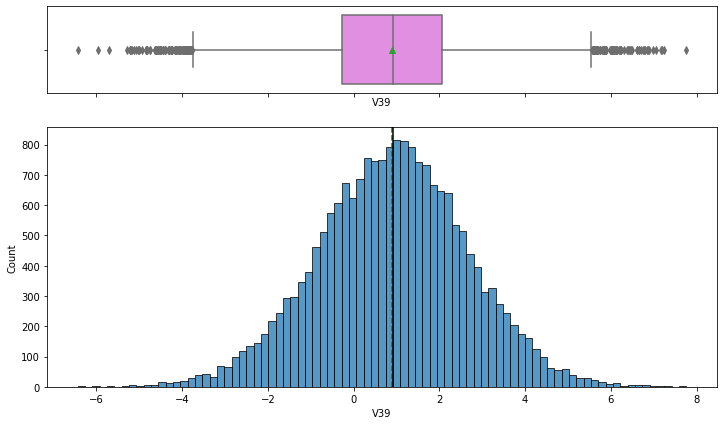

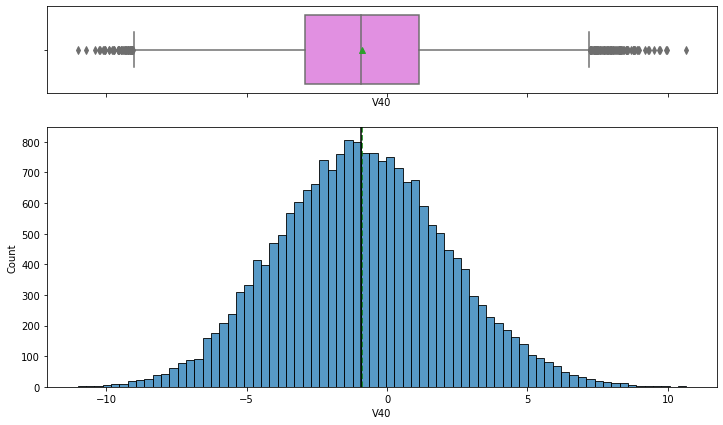

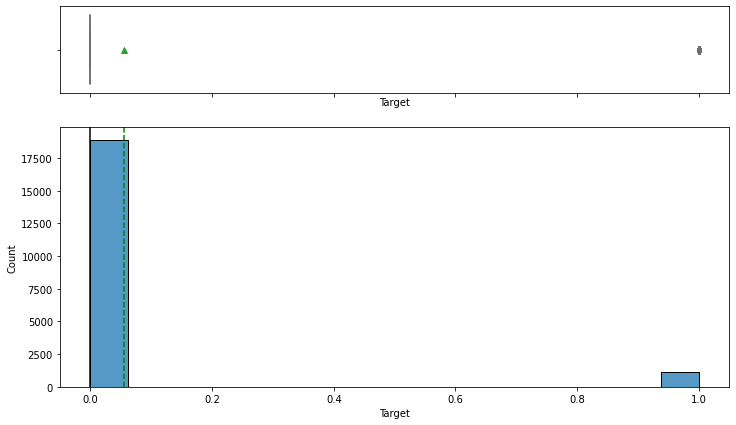

In [13]:
for feature in df_train.columns:
    histogram_boxplot(df_train, feature, figsize=(12, 7), kde=False, bins=None)

#### Observations
* V2, V4, V5, V6, V7, V9, V11, V12, V13, V14, V15, V17, V19, V20, V21, V23, V24, V25, V26, V28, V31, V32, V33, V34, V35, V36, V38, V39, V40 have a normal distribution with approx equal mean and median. Outliers on both ends of the boxplot. 
* V1, V3, V18, V27, V29, V37 have a normal distribution with approx equal mean and median and slight right tail. Outliers on both ends of the boxplot but mostly on the right end.
* V8, V10, V16, V30 have a normal distribution with approx equal mean and median and slight left tail. Outliers on both ends of the boxplot but mostly on the left end.
* V22: Normal distribution with approx equal mean and median. Outliers on both ends of the boxplot. A few extreme outliers on the left end.

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

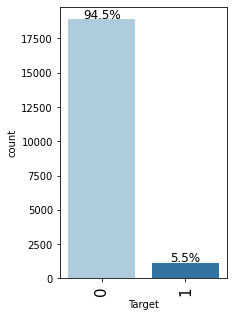

In [15]:
#Checking percentage of Target column in train data
labeled_barplot(df_train,"Target",perc=True)

#### Observations
* Only 5.5% of the train data is classed as target 1.
* When modelling we will try the SMOTE for Imbalanced Classification technique to balance the classes.

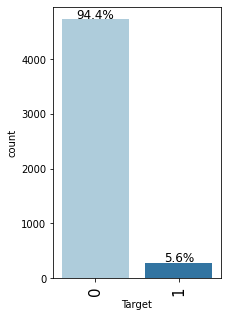

In [16]:
#Checking percentage of Target column in test data
labeled_barplot(df_test,"Target",perc=True)

#### Observations
* Only 5.6% of the train data is classed as target 1.
* Similiar class distributions between the train and the test data.

## Data Pre-processing

In [134]:
# Dividing data into X and y for train data
X = df_train.drop(["Target"], axis=1)
y = df_train["Target"]


# Dividing data into X and y for test data
X_test = df_test.drop(["Target"], axis=1) 
y_test = df_test["Target"]

In [135]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y)

print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


### Missing-Value Treatment
* We will use KNN imputer to impute missing values. There are missing values for V1 and V2 in the train and test dataset.

In [136]:
df_train.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [137]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = ["V1","V2"]

In [138]:
imputer = KNNImputer(n_neighbors=5)

In [139]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [140]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [11]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [12]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [141]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

In [14]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))
    
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 0.7210807301060529
Random forest: 0.7223144073299184
GBM: 0.7066589712141981
Adaboost: 0.6309140754635308
Xgboost: 0.7992208354375586
dtree: 0.6982829521679532

Training Performance:

Bagging: 95.67307692307693
Random forest: 100.0
GBM: 81.85096153846155
Adaboost: 65.86538461538461
Xgboost: 100.0
dtree: 100.0

Validation Performance:

Bagging: 73.02158273381295
Random forest: 72.66187050359713
GBM: 72.3021582733813
Adaboost: 67.62589928057554
Xgboost: 82.37410071942446
dtree: 70.50359712230215


#### Observations

* The Performance of XGBoost  and RandomForest is highest on cross-validation.
* All models (with the exception of Adaboost) are overfitting the training data.

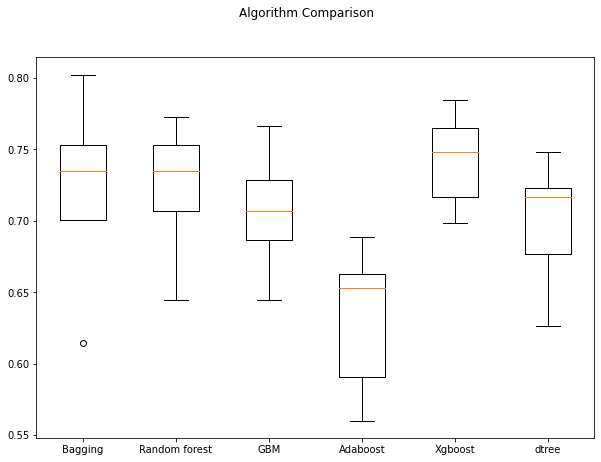

In [28]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

#### Observations

* We can see that XGBoost is giving the highest cross-validated recall followed by Bagging.
* The boxplot shows that the performance of Bagging is consistent with 1 outlier.
* We will try to improve the models by using SMOTE and RandomUnderSampler technics to balance the minority class.

### Model Building with Oversampled data


In [15]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 832
Before Oversampling, counts of label 'No': 14168 

After Oversampling, counts of label 'Yes': 14168
After Oversampling, counts of label 'No': 14168 

After Oversampling, the shape of train_X: (28336, 40)
After Oversampling, the shape of train_y: (28336,) 



In [30]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))
    
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 0.9762847187883701
Random forest: 0.9839075010941964
GBM: 0.9258892262056152
Adaboost: 0.8978689011775473
Xgboost: 0.9220070890485434
dtree: 0.9720494245534969

Training Performance:

Bagging: 99.78825522303784
Random forest: 100.0
GBM: 93.11829474872954
Adaboost: 90.26679841897233
Xgboost: 92.61010728402033
dtree: 100.0

Validation Performance:

Bagging: 83.09352517985612
Random forest: 85.25179856115108
GBM: 87.76978417266187
Adaboost: 85.61151079136691
Xgboost: 87.41007194244604
dtree: 77.6978417266187


#### Observations

* Performance on cross-validation has improved for all models using SMOTE.
* The Performance of XGBoost  and RandomForest is highest on cross-validation. This is consistent with the original data. 
* Validation performance has improved for all models.
* All models (with the exception of Adaboost and GBM) are overfitting the training data.
* Overall using SMOTE has improved the performance of all models.

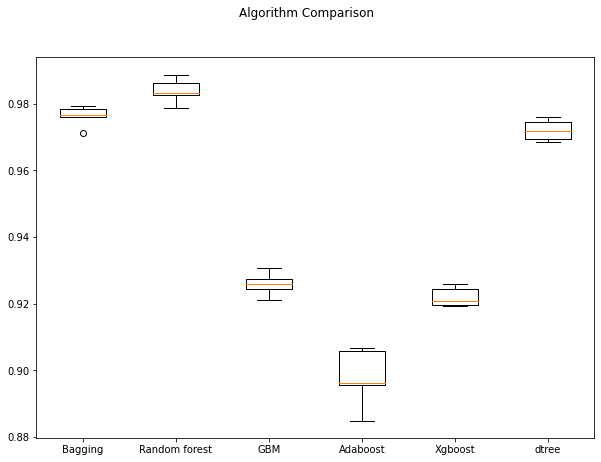

In [31]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

#### Observations

* All models are giving a high cross-validated recall.
* We can see that XGBoost is giving the highest cross-validated recall followed by RandomForest. In the previous graph, XGBoost had the highest cross-validated recall followed by Bagging.
* The boxplot shows that the performance of XGBoost and Bagging is consistent with 1 outlier.

### Model Building with Undersampled data

In [142]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [33]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 832
Before Undersampling, counts of label 'No': 14168 

After Undersampling, counts of label 'Yes': 832
After Undersampling, counts of label 'No': 832 

After Undersampling, the shape of train_X: (1664, 40)
After Undersampling, the shape of train_y: (1664,) 



In [34]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    print("{}: {}".format(name, scores))
    
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 0.8641945025611427
Random forest: 0.9038669648654498
GBM: 0.8978572974532861
Adaboost: 0.8666113556020489
Xgboost: 0.9002669360075031
dtree: 0.8617776495202367

Training Performance:

Bagging: 98.3173076923077
Random forest: 100.0
GBM: 93.99038461538461
Adaboost: 90.5048076923077
Xgboost: 92.90865384615384
dtree: 100.0

Validation Performance:

Bagging: 87.05035971223022
Random forest: 89.20863309352518
GBM: 88.84892086330936
Adaboost: 84.89208633093526
Xgboost: 88.84892086330936
dtree: 84.17266187050359


#### Observations

* The performance on cross-validation (with the exception of GBM) has decreased for all models using RandomUnderSampler compared to SMOTE.
* The Performance of XGBoost  and RandomForest is highest on cross-validation. This is consistent with the previous ran models. 
* Validation performance has improved for all models except Adaboost. 
* All models (with the exception of GBM and XGBoost) are overfitting the training data.
* Overall RandomUnderSampler has improved the validation performance, however the cross-validation performance is lower.

### Visualizing the best model (XGBoost with undersampled data)

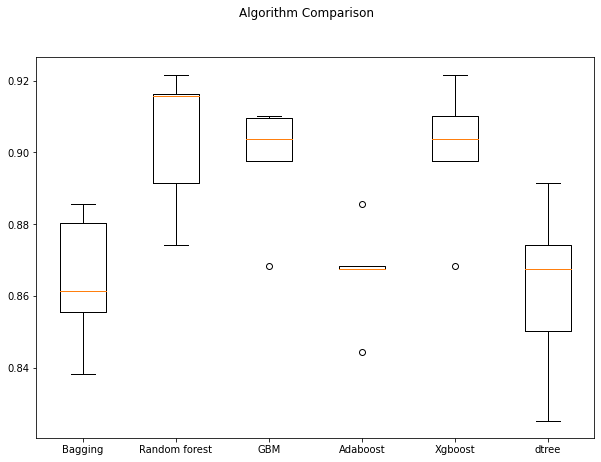

In [35]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

#### Observations

* All models are giving a high cross-validated recall.
* We can see that XGBoost is giving the highest cross-validated recall followed by RandomForest. In the previous graph, XGBoost had the highest cross-validated recall followed by Bagging.
* The boxplot shows that the performance of XGBoost and Bagging is consistent with 1 outlier.
* Overall using SMOTE and RandomUnderSampler has improved the performance of all models. We will now tune are models using Hyperparamaters to improve the scores.

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Bagging with oversampled data

In [36]:
%%time 

# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_samples': [0.8,0.9,1],
              'max_features': [0.7, 0.8, 0.9], 
              'n_estimators' : [30,50,70]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.9827076837384581:
CPU times: user 1min 21s, sys: 1.25 s, total: 1min 22s
Wall time: 22min 26s


In [17]:
# building model with best parameters
bagging_tuned_over = BaggingClassifier(
    n_estimators=70,
    max_samples=0.9,
    max_features=0.8)

# Fit the model on training data
bagging_tuned_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70)

In [18]:
# Calculating different metrics on train set
bagging_tuned_over_grid_train = model_performance_classification_sklearn(
    bagging_tuned_over, X_train_over, y_train_over
)
print("Training performance:")
bagging_tuned_over_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [19]:
# Calculating different metrics on validation set
bagging_tuned_over_grid_val = model_performance_classification_sklearn(bagging_tuned_over, X_val, y_val)
print("Validation performance:")
bagging_tuned_over_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.986,0.860,0.879,0.869


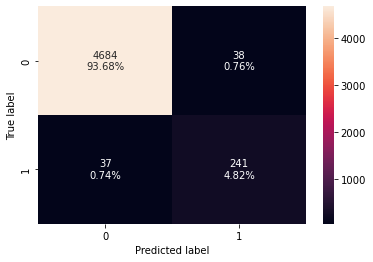

In [23]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_tuned_over, X_val, y_val)

### Bagging with undersampled data

In [37]:
%%time 

# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_samples': [0.8,0.9,1],
              'max_features': [0.7, 0.8, 0.9], 
              'n_estimators' : [30,50,70]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8966236202294207:
CPU times: user 3.4 s, sys: 74.9 ms, total: 3.48 s
Wall time: 47.1 s


In [20]:
# building model with best parameters
bagging_tuned_un = BaggingClassifier(
    n_estimators=70,
    max_samples=0.9,
    max_features=0.9)

# Fit the model on training data
bagging_tuned_un.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70)

In [21]:
# Calculating different metrics on train set
bagging_tuned_un_grid_train = model_performance_classification_sklearn(
    bagging_tuned_un, X_train_un, y_train_un
)
print("Training performance:")
bagging_tuned_un_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,0.999,1.000,0.999


In [22]:
# Calculating different metrics on validation set
bagging_tuned_un_grid_val = model_performance_classification_sklearn(bagging_tuned_un, X_val, y_val)
print("Validation performance:")
bagging_tuned_un_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.938,0.892,0.468,0.614


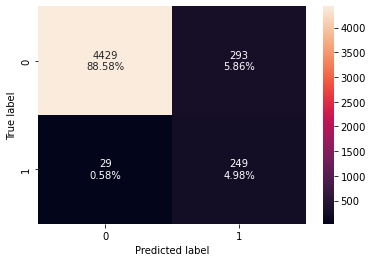

In [32]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_tuned_un, X_val, y_val)

#### Observations
* Tuned Bagging with oversampled data scored highly for recall. 0.94 for the training set and 0.89 for the validation set.
* 37 data points were classed as False Negative. 0.74% of the validation data.
* Scores for precision and F1 score on the validation set were however low.

* Tuned Bagging with undersampled data was not effective because the model overfit.
* Therefore tunned Bagging with oversampled data is the best model so far. Let's try RandomForest

### RandomForest with oversampled data

In [42]:
%%time 

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4), 
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.981648984732564:
CPU times: user 43 s, sys: 546 ms, total: 43.5 s
Wall time: 10min 38s


In [23]:
# building model with best parameters
randomforest_tuned_over = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features="sqrt")

# Fit the model on training data
randomforest_tuned_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=300)

In [24]:
# Calculating different metrics on train set
randomforest_tuned_over_grid_train = model_performance_classification_sklearn(
    randomforest_tuned_over, X_train_over, y_train_over
)
print("Training performance:")
randomforest_tuned_over_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


In [25]:
# Calculating different metrics on validation set
randomforest_tuned_over_grid_val = model_performance_classification_sklearn(randomforest_tuned_over, X_val, y_val)
print("Validation performance:")
randomforest_tuned_over_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.863,0.920,0.891


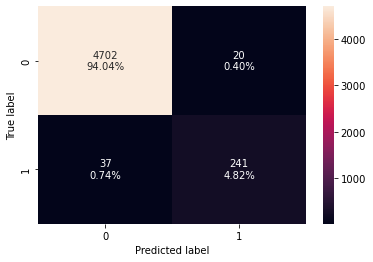

In [38]:
# creating confusion matrix
confusion_matrix_sklearn(randomforest_tuned_over, X_val, y_val)

### RandomForest with undersampled data

In [43]:
%%time 

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4), 
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8978140105331505:
CPU times: user 1.95 s, sys: 68.1 ms, total: 2.02 s
Wall time: 33.3 s


In [26]:
# building model with best parameters
randomforest_tuned_un = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features="sqrt")

# Fit the model on training data
randomforest_tuned_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [27]:
# Calculating different metrics on train set
randomforest_tuned_un_grid_train = model_performance_classification_sklearn(
    randomforest_tuned_un, X_train_un, y_train_un
)
print("Training performance:")
randomforest_tuned_un_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.985,0.971,0.999,0.985


In [28]:
# Calculating different metrics on validation set
randomforest_tuned_un_grid_val = model_performance_classification_sklearn(randomforest_tuned_un, X_val, y_val)
print("Validation performance:")
randomforest_tuned_un_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.942,0.888,0.487,0.629


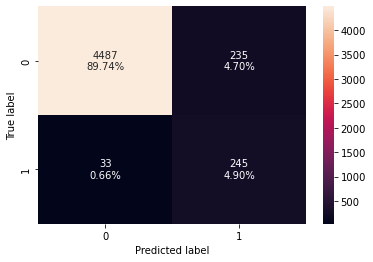

In [42]:
# creating confusion matrix
confusion_matrix_sklearn(randomforest_tuned_un, X_val, y_val)

#### Observations
* Both models of the RandomForest overfitted the data.
* Therefore Tuned Baggining with oversampled data remains the best model. Let's try Gradient Boosting.

### Gradient Boosting with oversampled data

In [48]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9684506450715318:
CPU times: user 24 s, sys: 453 ms, total: 24.4 s
Wall time: 8min 57s


In [29]:
# building model with best parameters
GBM_tuned_over = GradientBoostingClassifier(
    n_estimators=125,
    subsample=0.7,
    max_features=0.5,
    learning_rate=1)

# Fit the model on training data
GBM_tuned_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

In [30]:
# Calculating different metrics on train set
GBM_tuned_over_grid_train = model_performance_classification_sklearn(
    GBM_tuned_over, X_train_over, y_train_over
)
print("Training performance:")
GBM_tuned_over_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.992,0.992,0.992,0.992


In [31]:
# Calculating different metrics on validation set
GBM_tuned_over_grid_val = model_performance_classification_sklearn(GBM_tuned_over, X_val, y_val)
print("Validation performance:")
GBM_tuned_over_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.962,0.838,0.615,0.709


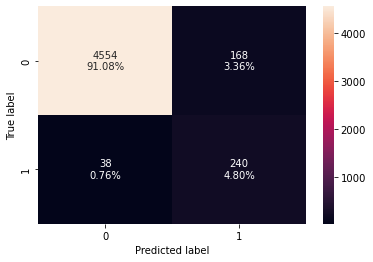

In [46]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned_over, X_val, y_val)

### Gradient Boosting with undersampled data

In [49]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.9050212827357333:
CPU times: user 1.48 s, sys: 34.1 ms, total: 1.51 s
Wall time: 27.3 s


In [32]:
# building model with best parameters
GBM_tuned_un = GradientBoostingClassifier(
    n_estimators=125,
    subsample=0.7,
    max_features=0.5,
    learning_rate=0.2)

# Fit the model on training data
GBM_tuned_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

In [33]:
# Calculating different metrics on train set
GBM_tuned_un_grid_train = model_performance_classification_sklearn(
    GBM_tuned_un, X_train_un, y_train_un
)
print("Training performance:")
GBM_tuned_un_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996,0.992,1.000,0.996


In [34]:
# Calculating different metrics on validation set
GBM_tuned_un_grid_val = model_performance_classification_sklearn(GBM_tuned_un, X_val, y_val)
print("Validation performance:")
GBM_tuned_un_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.931,0.888,0.441,0.589


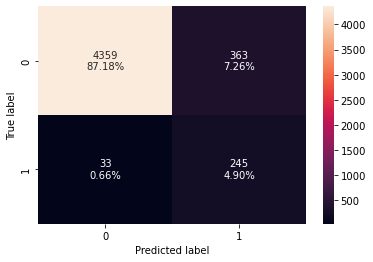

In [50]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned_un, X_val, y_val)

#### Observations
* Both models of the Gradient Boost overfitted the data.
* Therefore Tuned Baggining with oversampled data remains the best model. Let's try Adaboost.

### Adaboost with oversampled data

In [54]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [100, 150, 200],
              "learning_rate": [0.2, 0.05],
              "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),]}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9719089538783383:
CPU times: user 1min 59s, sys: 1.3 s, total: 2min
Wall time: 25min 56s


In [35]:
# building model with best parameters
adaboost_tuned_over = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

# Fit the model on training data
adaboost_tuned_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [36]:
# Calculating different metrics on train set
adaboost_tuned_over_grid_train = model_performance_classification_sklearn(
    adaboost_tuned_over, X_train_over, y_train_over
)
print("Training performance:")
adaboost_tuned_over_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.992,0.988,0.996,0.992


In [37]:
# Calculating different metrics on validation set
adaboost_tuned_over_grid_val = model_performance_classification_sklearn(adaboost_tuned_over, X_val, y_val)
print("Validation performance:")
adaboost_tuned_over_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.980,0.856,0.793,0.824


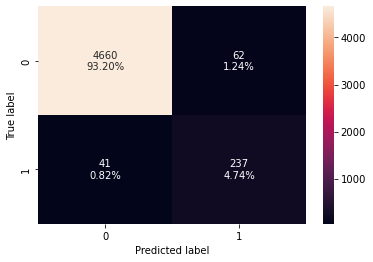

In [58]:
# creating confusion matrix
confusion_matrix_sklearn(adaboost_tuned_over, X_val, y_val)

### Adaboost with undersampled data

In [55]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [100, 150, 200],
              "learning_rate": [0.2, 0.05],
              "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),]}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8846114998917827:
CPU times: user 3.41 s, sys: 58.1 ms, total: 3.47 s
Wall time: 1min 17s


In [38]:
# building model with best parameters
adaboost_tuned_un = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.05,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1))

# Fit the model on training data
adaboost_tuned_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100)

In [39]:
# Calculating different metrics on train set
adaboost_tuned_un_grid_train = model_performance_classification_sklearn(
    adaboost_tuned_un, X_train_un, y_train_un
)
print("Training performance:")
adaboost_tuned_un_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.969,0.942,0.995,0.968


In [40]:
# Calculating different metrics on validation set
adaboost_tuned_un_grid_val = model_performance_classification_sklearn(adaboost_tuned_un, X_val, y_val)
print("Validation performance:")
adaboost_tuned_un_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.928,0.885,0.430,0.579


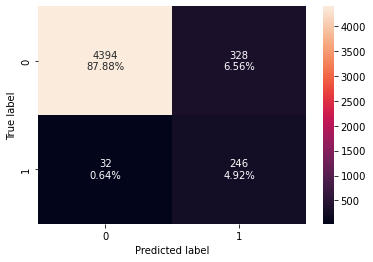

In [62]:
# creating confusion matrix
confusion_matrix_sklearn(adaboost_tuned_un, X_val, y_val)

#### Observations
* Tuned Adaboost with oversampled data was not effective because the model overfit.
* Tuned Adaboost with undersampled data scored highly for recall. 0.94 for the training set and 0.89 for the validation set. Same as the tunned Bagging with oversampled data.
* 32 data points were classed as False Negative. 0.64% of the validation data. This is better than the 37 data points from the tunned Bagging with oversampled data.
* Therefore tunned Adaboost with oversampled data is the best model so far. Let's try XGBoost

### XGBoost with oversampled data

In [56]:
%%time 

# defining model
model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [100, 150, 200],
              "scale_pos_weight": [5,10],
              "learning_rate": [0.1,0.2],
              "gamma": [0,3,5],
              'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.9931537547320731:
CPU times: user 14 s, sys: 327 ms, total: 14.4 s
Wall time: 6min 57s


In [41]:
# building model with best parameters
xgb_tuned_over = XGBClassifier(
    n_estimators=150,
    subsample=0.9,
    scale_pos_weight=10,
    learning_rate=0.2,
    gamma=0)
    
# Fit the model on training data
xgb_tuned_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [88]:
# Calculating different metrics on train set
xgb_tuned_over_grid_train = model_performance_classification_sklearn(
    xgb_tuned_over, X_train_over, y_train_over
)
print("Training performance:")
xgb_tuned_over_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [89]:
# Calculating different metrics on validation set
xgb_tuned_over_grid_val = model_performance_classification_sklearn(xgb_tuned_over, X_val, y_val)
print("Validation performance:")
xgb_tuned_over_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.980,0.874,0.794,0.832


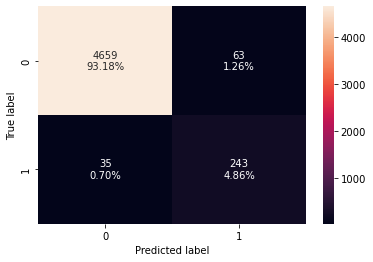

In [68]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_over, X_val, y_val)

### XGBoost with undersampled data

In [57]:
%%time 

# defining model
model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [100, 150, 200],
              "scale_pos_weight": [5,10],
              "learning_rate": [0.1,0.2],
              "gamma": [0,3,5],
              'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9326599812423346:
CPU times: user 912 ms, sys: 27.1 ms, total: 939 ms
Wall time: 25.4 s


In [44]:
# building model with best parameters
xgb_tuned_un = XGBClassifier(
    n_estimators=100,
    subsample=0.8,
    scale_pos_weight=10,
    learning_rate=0.1,
    gamma=3)
    
# Fit the model on training data
xgb_tuned_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [90]:
# Calculating different metrics on train set
xgb_tuned_un_grid_train = model_performance_classification_sklearn(
    xgb_tuned_un, X_train_un, y_train_un
)
print("Training performance:")
xgb_tuned_un_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.993,1.000,0.987,0.993


In [91]:
# Calculating different metrics on validation set
xgb_tuned_un_grid_val = model_performance_classification_sklearn(xgb_tuned_un, X_val, y_val)
print("Validation performance:")
xgb_tuned_un_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.870,0.910,0.288,0.437


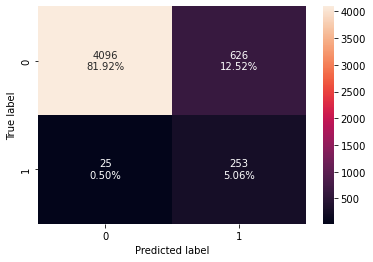

In [72]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_un, X_val, y_val)

#### Observations
* Both models overfit the data.
* Therefore tunned Adaboost with oversampled data remains the best model.
* Let's try the Decision tree model.

### Decision tree with oversampled data

In [58]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9102913265648006:


In [47]:
# building model with best parameters
dtree_tuned_over = DecisionTreeClassifier(
    min_samples_leaf=7,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=3)
    
# Fit the model on training data
dtree_tuned_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7)

In [48]:
# Calculating different metrics on train set
dtree_tuned_over_grid_train = model_performance_classification_sklearn(
    dtree_tuned_over, X_train_over, y_train_over
)
print("Training performance:")
dtree_tuned_over_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.843,0.917,0.799,0.854


In [49]:
# Calculating different metrics on validation set
dtree_tuned_over_grid_val = model_performance_classification_sklearn(dtree_tuned_over, X_val, y_val)
print("Validation performance:")
dtree_tuned_over_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.763,0.885,0.176,0.294


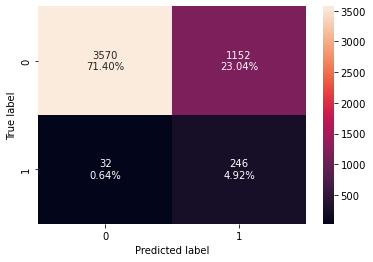

In [76]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned_over, X_val, y_val)

### Decision tree with undersampled data

In [59]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7], 
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.850811629752543:


In [50]:
# building model with best parameters
dtree_tuned_un = DecisionTreeClassifier(
    min_samples_leaf=1,
    min_impurity_decrease=0.001,
    max_leaf_nodes=5,
    max_depth=2)
    
# Fit the model on training data
dtree_tuned_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.001)

In [51]:
# Calculating different metrics on train set
dtree_tuned_un_grid_train = model_performance_classification_sklearn(
    dtree_tuned_un, X_train_un, y_train_un
)
print("Training performance:")
dtree_tuned_un_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.764,0.909,0.705,0.794


In [52]:
# Calculating different metrics on validation set
dtree_tuned_un_grid_val = model_performance_classification_sklearn(dtree_tuned_un, X_val, y_val)
print("Validation performance:")
dtree_tuned_un_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.609,0.888,0.114,0.202


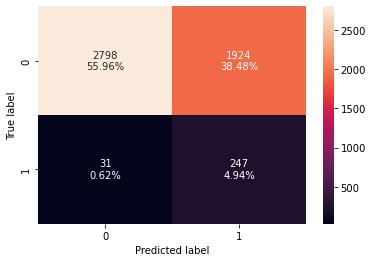

In [80]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned_un, X_val, y_val)

#### Observations

* Both DecisionTree models scored highly for recall. 
* The tunned DecisionTree with oversampled data scored 0.92 for the training set and 0.89 for the validation set.
* The tunned DecisionTree with undersampled data scored 0.91 for the training set and 0.89 for the validation set.
* The recall score for the tunned DecisionTree with undersampled data score ever so slightly higher than the adaboost model for the validation dataset (0.888 versus 0.885). Additionally this model classed 31 data as False Negative compared to the 32 of the adaboost model.
* Therefore the tunned DecisionTree with undersampled data is the best model. 

## Model performance comparison and choosing the final model

In [84]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_tuned_over_grid_train.T, bagging_tuned_un_grid_train.T,
        randomforest_tuned_over_grid_train.T,randomforest_tuned_un_grid_train.T,
        GBM_tuned_over_grid_train.T,GBM_tuned_un_grid_train.T,
        adaboost_tuned_over_grid_train.T,adaboost_tuned_un_grid_train.T,
        xgb_tuned_over_grid_train.T,xgb_tuned_un_grid_train.T,
        dtree_tuned_over_grid_train.T,dtree_tuned_un_grid_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging tuned with oversampled data","Bagging tuned with undersampled data",
    "RandomForest tuned with oversampled data","RandomForest tuned with undersampled data",
    "Gradient Boosting tuned with oversampled data","Gradient Boosting tuned with undersampled data",
    "Adaboost tuned with oversampled data","Adaboost tuned with undersampled data",
    "XGBoost tuned with oversampled data","XGBoost tuned with undersampled data",
    "DecisionTree tuned with oversampled data","DecisionTree tuned with undersampled data",
]

In [85]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        bagging_tuned_over_grid_val.T, bagging_tuned_un_grid_val.T,
        randomforest_tuned_over_grid_val.T,randomforest_tuned_un_grid_val.T,
        GBM_tuned_over_grid_val.T,GBM_tuned_un_grid_val.T,
        adaboost_tuned_over_grid_val.T,adaboost_tuned_un_grid_val.T,
        xgb_tuned_over_grid_val.T,xgb_tuned_un_grid_val.T,
        dtree_tuned_over_grid_val.T,dtree_tuned_un_grid_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Bagging tuned with oversampled data","Bagging tuned with undersampled data",
    "RandomForest tuned with oversampled data","RandomForest tuned with undersampled data",
    "Gradient Boosting tuned with oversampled data","Gradient Boosting tuned with undersampled data",
    "Adaboost tuned with oversampled data","Adaboost tuned with undersampled data",
    "XGBoost tuned with oversampled data","XGBoost tuned with undersampled data",
    "DecisionTree tuned with oversampled data","DecisionTree tuned with undersampled data",
]

In [86]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging tuned with oversampled data,Bagging tuned with undersampled data,RandomForest tuned with oversampled data,RandomForest tuned with undersampled data,Gradient Boosting tuned with oversampled data,Gradient Boosting tuned with undersampled data,Adaboost tuned with oversampled data,Adaboost tuned with undersampled data,XGBoost tuned with oversampled data,XGBoost tuned with undersampled data,DecisionTree tuned with oversampled data,DecisionTree tuned with undersampled data
Accuracy,1.000,0.999,1.000,0.985,0.992,0.996,0.992,0.969,1.000,0.993,0.843,0.764
Recall,1.000,0.999,0.999,0.971,0.992,0.992,0.988,0.942,1.000,1.000,0.917,0.909
Precision,1.000,1.000,1.000,0.999,0.992,1.000,0.996,0.995,1.000,0.987,0.799,0.705
F1,1.000,0.999,1.000,0.985,0.992,0.996,0.992,0.968,1.000,0.993,0.854,0.794


In [87]:
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Bagging tuned with oversampled data,Bagging tuned with undersampled data,RandomForest tuned with oversampled data,RandomForest tuned with undersampled data,Gradient Boosting tuned with oversampled data,Gradient Boosting tuned with undersampled data,Adaboost tuned with oversampled data,Adaboost tuned with undersampled data,XGBoost tuned with oversampled data,XGBoost tuned with undersampled data,DecisionTree tuned with oversampled data,DecisionTree tuned with undersampled data
Accuracy,0.986,0.938,0.988,0.942,0.962,0.931,0.980,0.928,0.980,0.870,0.763,0.609
Recall,0.860,0.892,0.863,0.888,0.838,0.888,0.856,0.885,0.874,0.910,0.885,0.888
Precision,0.879,0.468,0.920,0.487,0.615,0.441,0.793,0.430,0.794,0.288,0.176,0.114
F1,0.869,0.614,0.891,0.629,0.709,0.589,0.824,0.579,0.832,0.437,0.294,0.202


#### Observations

* The majority of the models overfit.
* The tunned Adaboost with undersampled data, and the two Decision Tree models had high recall scores.
* The tunned Decision Tree model with undersampled data gave the best validation recall of 0.888 but it has low values of validation accuracy, precision, and F1 score. 
* Let's check the model's performance on test set and then see the feature importance from the best model.

### Test set final performance

In [92]:
# Calculating different metrics on the test set
dtree_tuned_un_grid_test = model_performance_classification_sklearn(dtree_tuned_un, X_test, y_test)
print("Test performance:")
dtree_tuned_un_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.633,0.876,0.121,0.212


* Test score for recall is 0.876.
* Score for accuracy was 0.633, precision 0.121, and F1 0.212. Since recall is our focus these low scores are not a indicator of the models performance.  

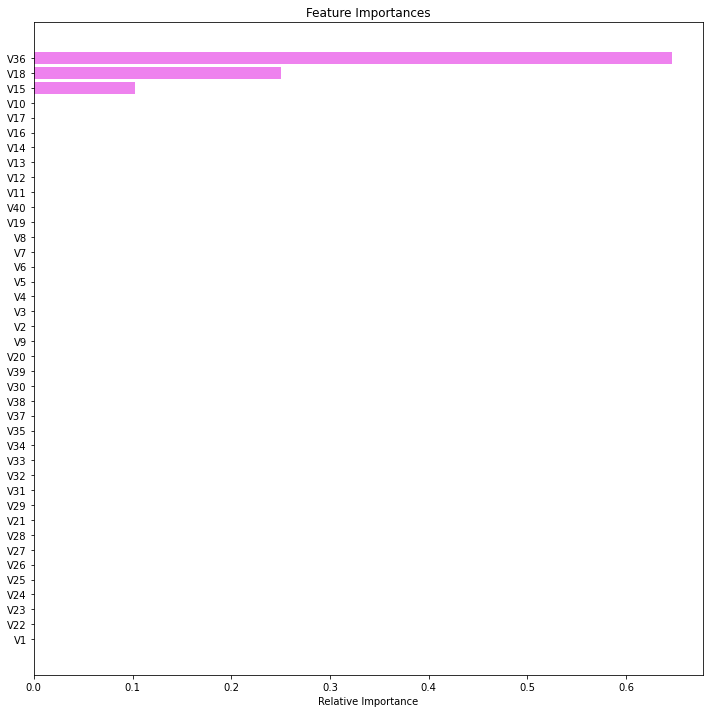

In [93]:
feature_names = X.columns
importances = dtree_tuned_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* V36 was the most important feature, followed by V18 and V15. The other sensors were not given relative importance by the model.

## Pipelines to build the final model


In [111]:
# creating a list of numerical variables
numerical_features = [
    "V1","V2","V3","V4","V5","V6","V7","V8","V9","V10",
    "V11","V12","V13","V14","V15","V16","V17","V18","V19","V20",
    "V21","V22","V23","V24","V25","V26","V27","V28","V29","V30",
    "V31","V32","V33","V34","V35","V36","V37","V38","V39","V40",
    ]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=5))])

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        
    ],
    remainder="passthrough",)

In [112]:
# Dividing data into X and y for train data
X = df_train.drop(["Target"], axis=1)
Y = df_train["Target"]


# Dividing data into X and y for test data
X_test = df_test.drop(["Target"], axis=1) 
y_test = df_test["Target"]

In [113]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(15000, 40) (5000, 40)


In [114]:
# Treating the missing values of the training set
reqd_col_for_impute = ["V1","V2"]
imputer = KNNImputer(n_neighbors=5)
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

In [115]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [118]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "Decision Tree",
            DecisionTreeClassifier(
                min_samples_leaf=1,
                min_impurity_decrease=0.001,
                max_leaf_nodes=5,
                max_depth=2
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train_un, y_train_un)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29',
                                                   'V30', ...])])),
                ('Decision Tree',
                 DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                                        min_impurity_decrease=0.001))])

In [119]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(model, X_test, y_test)
Model_test

,Accuracy,Recall,Precision,F1
0,0.609,0.888,0.114,0.202


* Recall score of 0.888 on the test set

# Business Insights and Conclusions

#### Best model and its performance

* The Decision Tree with tuned hyperparamaters and undersampled data had the best recall score of 0.888 on the test set. 
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.
* Score for accuracy was 0.609, precision 0.114, and F1 0.202. These scores are low, however are focus is to reduce False Negatives as these are the most costly. 


#### Important features

* Sensory V36 was the most important feature (approx. 65%), followed by V18 (approx. 25%) and V15 (approx. 10%). The other sensors were not given relative importance by the model.
* It is recommended for the company to invest in these 3 types of sensors for future predictive maintenance measurements and to improve their measurements. Ultiamtely with the goal of reducing False Negatives.
* The company can also consider no longer using the other 37 sensor types for predictive maintenance measurements. Depending on what these sensors are, this might save on labour costs, and maintenance costs.

***